In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'
sns.set(style='whitegrid', palette='Set2', font_scale=1.2)

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test_data.isnull().sum()))

print('\nDuplicated values in train {}'.format(train_data.duplicated().sum()))
print('Duplicated values in test {}'.format(test_data.duplicated().sum()))


Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


In [6]:
print('Embarkation per ports \n{}'.format(train_data['Embarked'].value_counts()))

Embarkation per ports 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [7]:
# since the most common port is Southampton the chances are that the missing one is from there
train_data['Embarked'].fillna(value='S', inplace=True)
test_data['Fare'].fillna(value=test_data.Fare.mean(), inplace=True)
test_data['Embarked'].fillna(value='S', inplace=True)

In [8]:
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test_data.isnull().sum()))


Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [9]:
print(train_data["Name"])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [10]:
#subset the data set using a boolean on the name containing 'master'.  Then select the age variable from that subset. 
#And finally, find the mean.
mean_age_miss = round(train_data[train_data["Name"].str.contains('Miss.', na=False)]['Age'].mean())
mean_age_mrs = round(train_data[train_data["Name"].str.contains('Mrs.', na=False)]['Age'].mean())
mean_age_mr = round(train_data[train_data["Name"].str.contains('Mr.', na=False)]['Age'].mean())
mean_age_master = round(train_data[train_data["Name"].str.contains('Master.', na=False)]['Age'].mean())

In [11]:
print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

Mean age of Miss. title 22
Mean age of Mrs. title 36
Mean age of Mr. title 33
Mean age of Master. title 5


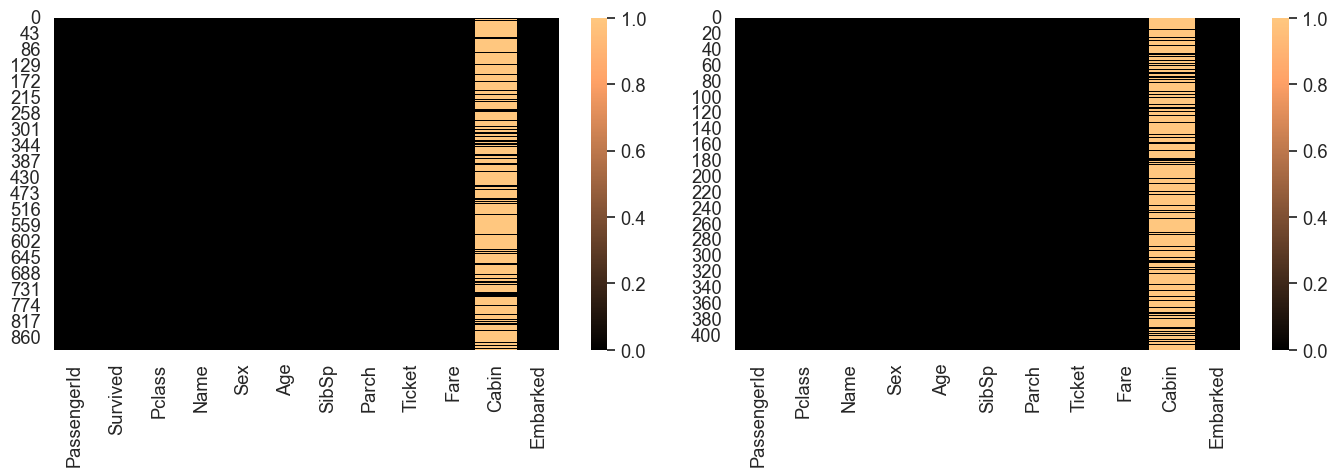

In [12]:
# fill in missing ages with the mean age in that category that we previously calculated

def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

train_data['Age'] = train_data[['Name', 'Age']].apply(fill_age,axis=1)
test_data['Age'] = test_data[['Name', 'Age']].apply(fill_age,axis=1)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(train_data.isnull(),cmap='copper', ax=ax1)
sns.heatmap(test_data.isnull(), cmap='copper', ax=ax2)
plt.tight_layout()

In [13]:
print(train_data[["Name","Age"]])

                                                  Name   Age
0                              Braund, Mr. Owen Harris  22.0
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                               Heikkinen, Miss. Laina  26.0
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                             Allen, Mr. William Henry  35.0
..                                                 ...   ...
886                              Montvila, Rev. Juozas  27.0
887                       Graham, Miss. Margaret Edith  19.0
888           Johnston, Miss. Catherine Helen "Carrie"  22.0
889                              Behr, Mr. Karl Howell  26.0
890                                Dooley, Mr. Patrick  32.0

[891 rows x 2 columns]


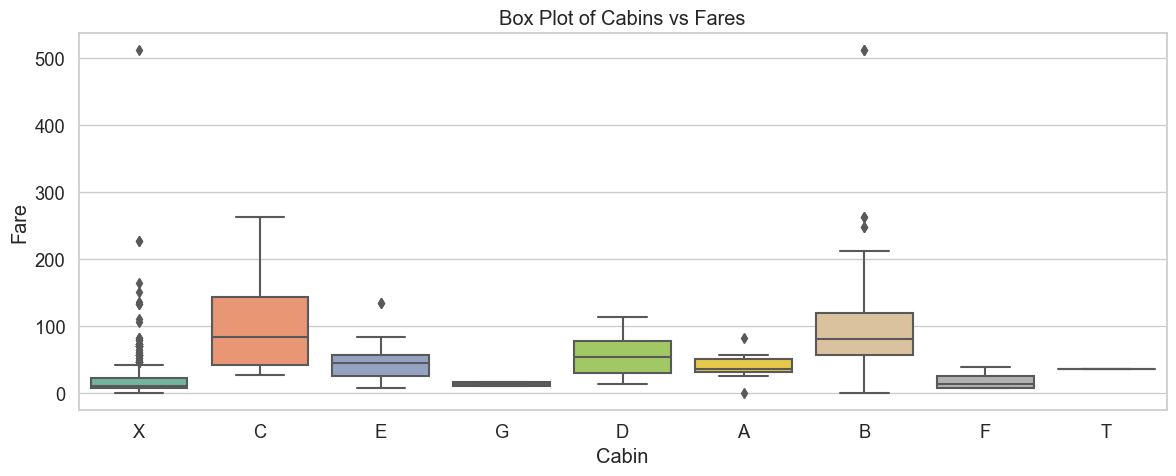

In [14]:
#Replace cabin values with the first letter of the cabin level. If null, code it as X.
train_data['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in train_data['Cabin']])
test_data['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in test_data['Cabin']])

#  Plot the cabin and fare data as a box plot
plt.figure(figsize=(12,5))
plt.title('Box Plot of Cabins vs Fares')
sns.boxplot(x='Cabin',y='Fare',data=train_data, palette='Set2')
plt.tight_layout()

In [15]:
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))


Null Values in Training 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [16]:
#There are now no null values in training. Note that we could attempt to recode the X values to match according to
#the cabin that amtches the closest fare range, but for now we will just proceed.

In [17]:
#We also have to hot-code the categorical variables.  Lets see the data types of each variable.

print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [18]:
#We'll drop the ticket variable and Passenger ID.  And then we will hot code the Sex, Cabin, and Embarked variables
train_data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket'])
test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [19]:
print(train_data.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object


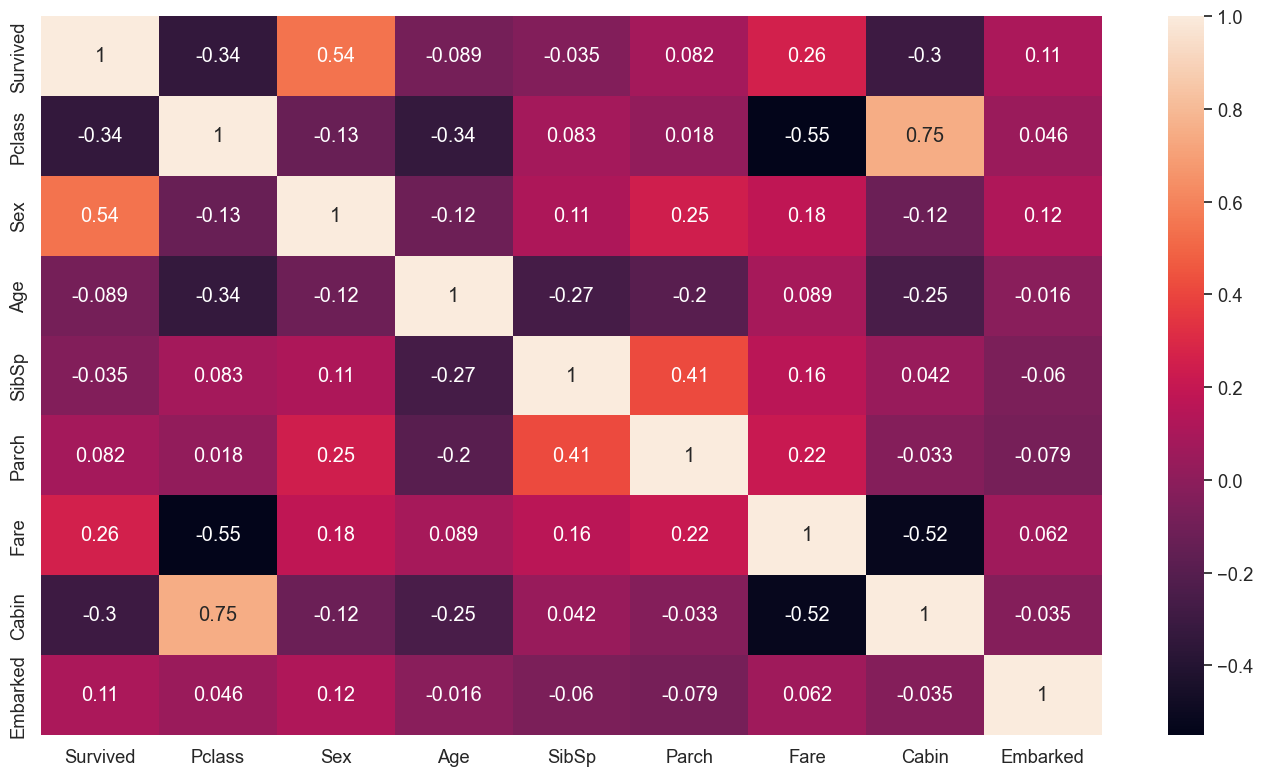

In [20]:
#Proceed with variable mapping

categories = {"female": 1, "male": 0}
train_data['Sex']= train_data['Sex'].map(categories)
test_data['Sex']= test_data['Sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked']= train_data['Embarked'].map(categories)
test_data['Embarked']= test_data['Embarked'].map(categories)

categories = train_data.Cabin.unique()
train_data['Cabin'] = train_data.Cabin.astype("category").cat.codes
test_data['Cabin'] = test_data.Cabin.astype("category").cat.codes

plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot=True)
plt.tight_layout()

In [21]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,8,1
1,1,1,1,38.0,1,0,71.2833,2,2
2,1,3,1,26.0,0,0,7.9250,8,1
3,1,1,1,35.0,1,0,53.1000,2,1
4,0,3,0,35.0,0,0,8.0500,8,1


In [22]:
# Dropping label
LABEL = 'Survived'
y = train_data[LABEL]
train_data = train_data.drop(LABEL, axis=1)  # Dropping label to normalize

In [23]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,22.0,1,0,7.2500,8,1
1,1,1,38.0,1,0,71.2833,2,2
2,3,1,26.0,0,0,7.9250,8,1
3,1,1,35.0,1,0,53.1000,2,1
4,3,0,35.0,0,0,8.0500,8,1


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

(712, 8) (179, 8)
(712,) (179,)


RandomForestClassifier()

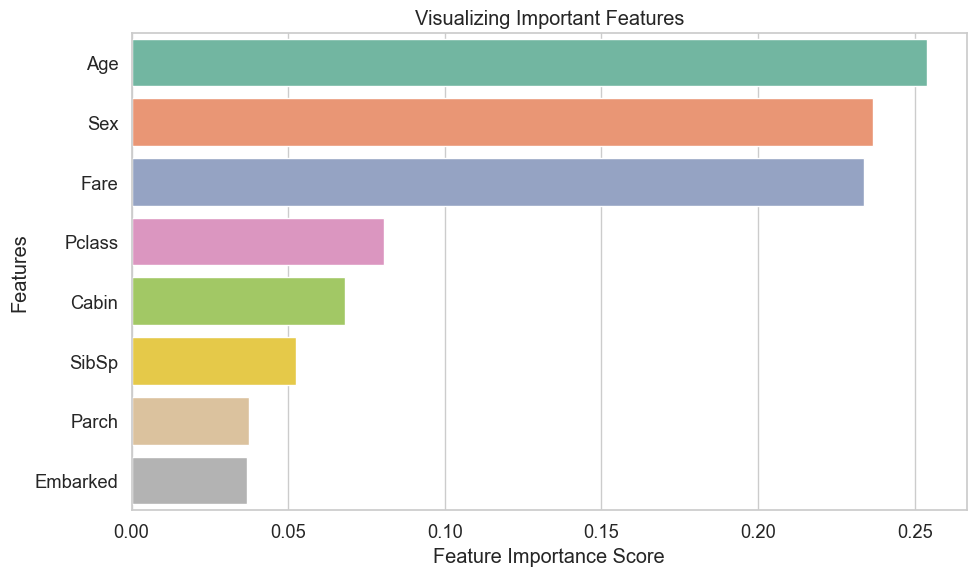

In [25]:
feature_imp = pd.Series(clf.feature_importances_, index=train_data.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

   Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       115
           1       0.75      0.64      0.69        64

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



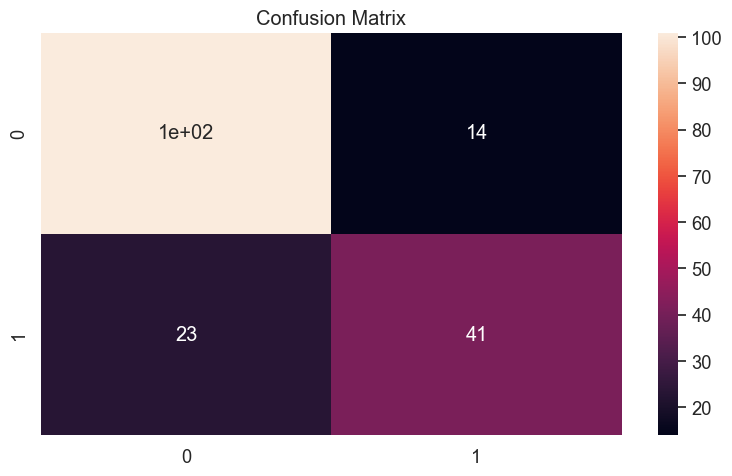

In [26]:
y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [27]:
# Removing less important features
new_train = train_data.drop(['Parch','Embarked'], axis=1)
new_test = test_data.drop(['Parch','Embarked'], axis=1)

   Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       103
           1       0.82      0.71      0.76        76

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survival_Predictions
0,3,0,34.5,0,0,7.8292,7,3,0
1,3,1,47.0,1,0,7.0000,7,1,0
2,2,0,62.0,0,0,9.6875,7,3,0
3,3,0,27.0,0,0,8.6625,7,1,1
4,3,1,22.0,1,1,12.2875,7,1,0
5,3,0,14.0,0,0,9.2250,7,1,0
6,3,1,30.0,0,0,7.6292,7,3,0
7,2,0,26.0,1,1,29.0000,7,1,0
8,3,1,18.0,0,0,7.2292,7,2,1
9,3,0,21.0,2,0,24.1500,7,1,0


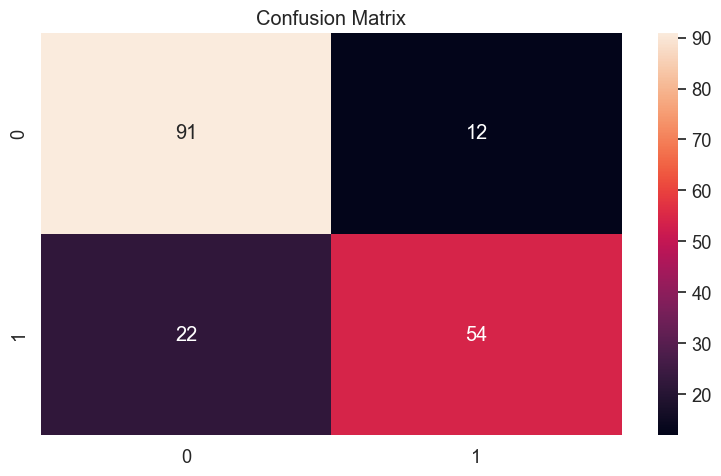

In [28]:
X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

prediction = clf.predict(new_test)

test_data['Survival_Predictions'] = pd.Series(prediction)
test_data.head(50)

In [ ]:
#to dos: update to one hot encoding for categorical variables.
#